In [1]:
import os
import pandas as pd
import json
import matplotlib.pyplot as plt

/Library/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
base_dir = '/Users/liyihan/Desktop/Work/ASL/ETF Hedging Data/ETF'
output_dir = os.path.join(base_dir, 'processed data')
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    
nav_df = pd.DataFrame()
etf_names = ['BILS', 'USFR', 'BIL', 'SGOV', 'IEF', 'TLT']

In [3]:
for etf_folder in os.listdir(base_dir):
    etf_path = os.path.join(base_dir, etf_folder, 'historical NAV prices')
    
    if os.path.isdir(etf_path):

        json_files = [f for f in os.listdir(etf_path) if f.endswith('.json')]
        
        if len(json_files) == 2:
            with open(os.path.join(etf_path, json_files[0]), 'r') as file:
                data1 = json.load(file)

            with open(os.path.join(etf_path, json_files[1]), 'r') as file:
                data2 = json.load(file)

            stream_data = data1['data']['stream'] + data2['data']['stream']

            rows = []
            index = []

            for entry in stream_data:
                last_updated = entry.pop('lastUpdated')
                performance = entry.pop('performance')

                for key, value in performance.items():
                    if isinstance(value, list) and len(value) > 0 and 'amount' in value[0]:
                        entry[key] = value[0]['amount']

                index.append(last_updated)
                rows.append(entry)

            df = pd.DataFrame(rows, index=pd.to_datetime(index))

            #   print(df)
            
            if nav_df.empty:
                nav_df = df[['navDate', 'nav']].drop_duplicates()
            else:
                df_temp = df[['navDate', 'nav']].drop_duplicates()
                df_temp.rename(columns={'nav': f'nav_{etf_folder}'}, inplace=True)
                nav_df = pd.merge(nav_df, df_temp, on='navDate', how='outer')


            output_file = os.path.join(output_dir, f'{etf_folder}.csv')
            df.to_csv(output_file)

            print(f'Successfully processed {etf_folder} and saved to {output_file}')

Successfully processed BILS-ETFs comprising of 3-12 Month Treasury Bills and saved to /Users/liyihan/Desktop/Work/ASL/ETF Hedging Data/ETF/processed data/BILS-ETFs comprising of 3-12 Month Treasury Bills.csv
Successfully processed USFR and saved to /Users/liyihan/Desktop/Work/ASL/ETF Hedging Data/ETF/processed data/USFR.csv
Successfully processed BIL-ETFs comprising of 1-3 Month Treasury Bills and saved to /Users/liyihan/Desktop/Work/ASL/ETF Hedging Data/ETF/processed data/BIL-ETFs comprising of 1-3 Month Treasury Bills.csv
Successfully processed SGOV and saved to /Users/liyihan/Desktop/Work/ASL/ETF Hedging Data/ETF/processed data/SGOV.csv
Successfully processed IEF-an ETF comprising of 7-10 Year Treasury Notes and saved to /Users/liyihan/Desktop/Work/ASL/ETF Hedging Data/ETF/processed data/IEF-an ETF comprising of 7-10 Year Treasury Notes.csv
Successfully processed TLT-an ETF comprising of Bonds and saved to /Users/liyihan/Desktop/Work/ASL/ETF Hedging Data/ETF/processed data/TLT-an ET

In [6]:
nav_df

,BILS,USFR,BIL,SGOV,IEF,TLT
navDate,,,,,,
2021-01-04,100.070350,25.106475,91.514454,100.015801,119.980988,157.692532
2021-01-05,100.070896,25.105846,91.513935,100.014627,119.649902,156.134543
2021-01-06,100.067845,25.105469,91.512743,100.014484,118.876441,152.696190
2021-01-07,100.065672,25.106960,91.512812,100.014396,118.605299,152.014162
2021-01-08,100.069879,25.107591,91.513138,100.014749,118.273899,151.475418
...,...,...,...,...,...,...
2024-05-26,99.321171,50.285369,91.749357,100.664438,92.795146,91.292031
2024-05-27,99.321171,50.285369,91.749357,100.664438,92.795146,91.292031
2024-05-28,99.332089,50.317386,91.761958,100.678521,92.336797,90.038392


In [5]:
nav_df.set_index('navDate', inplace= True)
nav_df.sort_index(inplace=True)
nav_df.columns = etf_names
nav_df.dropna(inplace=True)
nav_file = os.path.join(output_dir, 'NAV.csv')
nav_df.to_csv(nav_file)

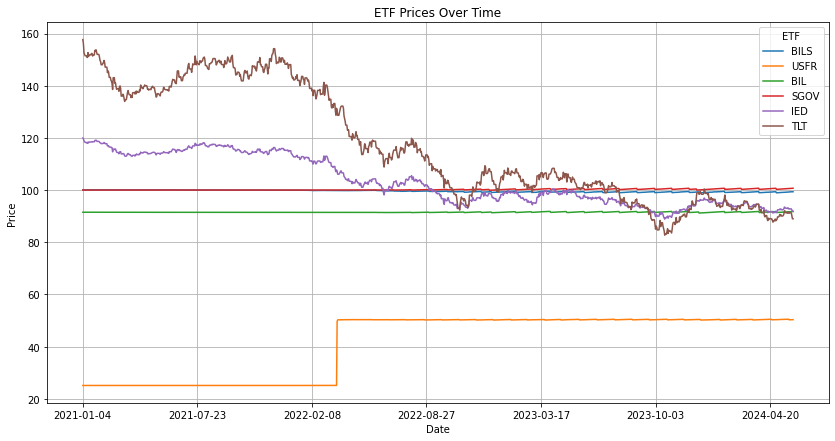

<Figure size 432x288 with 0 Axes>

In [18]:
nav_df.plot(figsize=(14, 7))
plt.title('ETF Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(title='ETF')
plt.grid(True)
plt.show()
plt.savefig('/Users/liyihan/Desktop/Work/ASL/ETF Hedging Data/ETF/output/ETF Prices Over Time.png')

In [ ]:
dates = nav_df.index.to_numpy()
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten() 

for i, column in enumerate(nav_df.columns):
    values = nav_df[column].to_numpy()

    axs[i].plot(dates, values, label=column)
    axs[i].set_title(f'{column} Prices Over Time')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Price')
    axs[i].legend(title='ETF')
    axs[i].grid(True)

plt.tight_layout()

plt.savefig('/Users/liyihan/Desktop/Work/ASL/ETF Hedging Data/ETF/output/combined_etf_prices_over_time.png')